# General data reader for AQUA 
## Example of datasets on Lumi

We added a few new data sources to the intake catalogue, pointing to resources already available on LUMI.

### Inspecting available datasets

Multiple datasets area available also for observations, so that we can also inspect the catalogue by checking what is inside. This can be done with the `inspect_catalogue` function

In [2]:
from aqua import catalogue, inspect_catalogue
from aqua import Reader
cat = catalogue()

FESOM	test-pi	5km experiment, coupuled with IFS
	- elem_grid	
	- node_grid	
	- original_2d	original 2d output
	- original_3d	original 3d output

IFS	test-tco79	5km experiment, coupuled with IFS
	- original_2d	original 2d output
IFS	tco79-eORCA1	tco79-eORCA1 data
	- atm2d	
	- atm3d	

ERA5	fdb	ERA5 data on fdb
	- fdb-test	Test FDB data

NEMO	tco79-eORCA1	tco79-eORCA1 data
	- fdb_nomagician	



Here below a short exploration at cataogue, model and experiment level

In [3]:
inspect_catalogue(cat)

Models available in catalogue:


['FESOM', 'IFS', 'ERA5', 'NEMO']

In [4]:
inspect_catalogue(cat, model = 'IFS')

Experiments available in catalogue for model IFS:


['test-tco79', 'tco79-eORCA1']

In [5]:
inspect_catalogue(cat, model = 'IFS', exp = 'tco79-eORCA1')

Sources available in catalogue for model IFS and exp tco79-eORCA1:


['atm2d', 'atm3d']

### IFS data

In [8]:
reader = Reader(model="IFS", exp="tco79-eORCA1", source="atm2d", regrid='r020')

In [9]:
data = reader.retrieve()
data

<xarray.Dataset>
Dimensions:    (time: 8305, value: 28480, level: 2)
Coordinates:
    lat        (value) float64 dask.array<chunksize=(28480,), meta=np.ndarray>
  * level      (level) int64 0 1
    lon        (value) float64 dask.array<chunksize=(28480,), meta=np.ndarray>
  * time       (time) datetime64[ns] 2020-01-20 ... 2020-12-31
Dimensions without coordinates: value
Data variables: (12/87)
    100si      (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    100u       (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    100v       (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    10u        (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    10v        (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    2d         (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    ...         ...
    vike       (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    vipie      (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    vipile     (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    vithe      (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    z          (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    zos        (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
Attributes:
    edition:            1
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          0
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

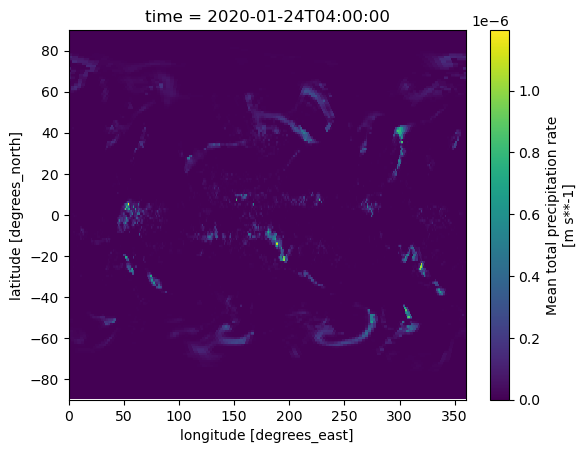

In [10]:
infile = data['tprate'].isel(time=100)
infile = reader.regrid(infile)
infile.plot()

In [12]:
reader = Reader(model="IFS", exp="tco79-eORCA1", source="atm3d", regrid='r100')

In [13]:
data = reader.retrieve()
data

<xarray.Dataset>
Dimensions:  (time: 1385, plev: 23, value: 28480)
Coordinates:
    lat      (value) float64 dask.array<chunksize=(28480,), meta=np.ndarray>
  * plev     (plev) float64 1e+05 9.75e+04 9.5e+04 ... 3e+03 1e+03 100.0
    lon      (value) float64 dask.array<chunksize=(28480,), meta=np.ndarray>
  * time     (time) datetime64[ns] 2020-01-20 2020-01-20T06:00:00 ... 2020-12-31
Dimensions without coordinates: value
Data variables: (12/15)
    cc       (time, plev, value) float64 dask.array<chunksize=(1, 1, 28480), meta=np.ndarray>
    ciwc     (time, plev, value) float64 dask.array<chunksize=(1, 1, 28480), meta=np.ndarray>
    clwc     (time, plev, value) float64 dask.array<chunksize=(1, 1, 28480), meta=np.ndarray>
    crwc     (time, plev, value) float64 dask.array<chunksize=(1, 1, 28480), meta=np.ndarray>
    cswc     (time, plev, value) float64 dask.array<chunksize=(1, 1, 28480), meta=np.ndarray>
    d        (time, plev, value) float64 dask.array<chunksize=(1, 1, 28480), meta=np.ndarray>
    ...       ...
    u        (time, plev, value) float64 dask.array<chunksize=(1, 1, 28480), meta=np.ndarray>
    v        (time, plev, value) float64 dask.array<chunksize=(1, 1, 28480), meta=np.ndarray>
    vo       (time, plev, value) float64 dask.array<chunksize=(1, 1, 28480), meta=np.ndarray>
    w        (time, plev, value) float64 dask.array<chunksize=(1, 1, 28480), meta=np.ndarray>
    z        (time, plev, value) float64 dask.array<chunksize=(1, 1, 28480), meta=np.ndarray>
    ~        (time, plev, value) float64 dask.array<chunksize=(1, 1, 28480), meta=np.ndarray>
Attributes:
    edition:            1
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          0
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

## NEMO access (experimental)

There is an experimantal source available at the moment on lumi:

In [16]:
reader = Reader(model='NEMO', exp='tco79-eORCA1', source='fdb_nomagician', areas=False)

2023-06-09 12:22:59 :: Reader :: WARNING  -> No fixes available for model NEMO


In [17]:
data = reader.retrieve(fix=False)

In [18]:
data

<xarray.Dataset>
Dimensions:      (time: 5927, cell: 120184, level: 75)
Coordinates:
  * level        (level) int64 1 2 3 4 5 6 7 8 9 ... 67 68 69 70 71 72 73 74 75
  * time         (time) datetime64[ns] 2020-01-20T02:00:00 ... 2020-09-23
Dimensions without coordinates: cell
Data variables: (12/18)
    avg_hc300m   (time, cell) float64 dask.array<chunksize=(1, 120184), meta=np.ndarray>
    avg_hc700m   (time, cell) float64 dask.array<chunksize=(1, 120184), meta=np.ndarray>
    avg_siconc   (time, cell) float64 dask.array<chunksize=(1, 120184), meta=np.ndarray>
    avg_sithick  (time, cell) float64 dask.array<chunksize=(1, 120184), meta=np.ndarray>
    avg_sos      (time, cell) float64 dask.array<chunksize=(1, 120184), meta=np.ndarray>
    avg_tos      (time, cell) float64 dask.array<chunksize=(1, 120184), meta=np.ndarray>
    ...           ...
    ulat         (cell) float64 dask.array<chunksize=(120184,), meta=np.ndarray>
    ulon         (cell) float64 dask.array<chunksize=(120184,), meta=np.ndarray>
    vlat         (cell) float64 dask.array<chunksize=(120184,), meta=np.ndarray>
    vlon         (cell) float64 dask.array<chunksize=(120184,), meta=np.ndarray>
    wlat         (cell) float64 dask.array<chunksize=(120184,), meta=np.ndarray>
    wlon         (cell) float64 dask.array<chunksize=(120184,), meta=np.ndarray>
Attributes:
    edition:            2
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          255
    uuidOfHGrid:        16076978-a048-4107-47dd-7c9876677b28
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.Ma...

`areas=True` still not working but data are available (notice in the plot below that value are not the one expected because NaN values are not what expected in the data description):

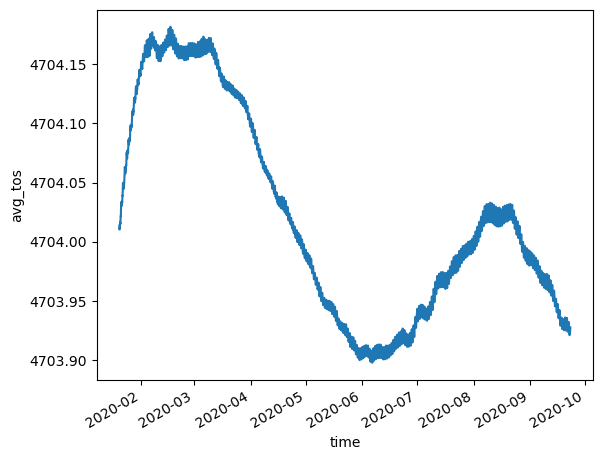

In [19]:
data.avg_tos.mean(dim='cell').plot()

## FDB/GSV access

We implemented FDB access in the reader using the GSV reader interface and a new intake driver which we developed. Also in this case the idea is to 'shield' the users from complex mars-style requests, allowing them to focus on the desired variables and experiments.

For now the "fdb-test" dataset and a "fdb-long" datasets are available, including some common climate variables, for a few days. as described in the [GSV Reader fdb-test documentation](https://earth.bsc.es/gitlab/digital-twins/de_340/gsv_interface/-/wikis/Specification-of-fdb-test) and [GSV Reader fdb-long documentation](https://earth.bsc.es/gitlab/digital-twins/de_340/gsv_interface/-/wikis/Specifications-of-fdb-long).

An important difference compared to other data sources is that in this case the reader always returns a generator object (a python iterator). This allows to take into consideration the fact that reading from FDB is not lazy and recreates some form of lazyness when working with the data.

### Access to the fdb-test archive

In [1]:
from aqua import Reader
reader = Reader(model="ERA5", exp="fdb", source="fdb-test", regrid="r200", aggregation="D")

In [2]:
data = reader.retrieve(startdate="20200120", enddate="20010220", var="tcc")

The result is now an 'iterator'

In [3]:
data

<generator object FixerMixin._fixergen at 0x7fa54073aff0>

We can either loop over the iterator or just get the next value. It is only now that the reader will actually retrieve the field(s) from FDB:

In [4]:
data0 = next(data)

Correctly decoded tp     on level sfc    at 2005-04-01T00:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T01:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T02:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T03:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T04:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T05:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T06:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T07:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T08:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T09:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T10:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T11:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T12:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T13:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T14:00:00
Correctly decoded tp     on level sfc   

This is the first day. Let's instead loop over the next ones:

In [5]:
for d in data:
    dm = reader.fldmean(d).mean(dim="time").tp
    print(dm.values)

Correctly decoded tp     on level sfc    at 2005-04-02T00:00:00
Correctly decoded tp     on level sfc    at 2005-04-02T01:00:00
Correctly decoded tp     on level sfc    at 2005-04-02T02:00:00
Correctly decoded tp     on level sfc    at 2005-04-02T03:00:00
Correctly decoded tp     on level sfc    at 2005-04-02T04:00:00
Correctly decoded tp     on level sfc    at 2005-04-02T05:00:00
Correctly decoded tp     on level sfc    at 2005-04-02T06:00:00
Correctly decoded tp     on level sfc    at 2005-04-02T07:00:00
Correctly decoded tp     on level sfc    at 2005-04-02T08:00:00
Correctly decoded tp     on level sfc    at 2005-04-02T09:00:00
Correctly decoded tp     on level sfc    at 2005-04-02T10:00:00
Correctly decoded tp     on level sfc    at 2005-04-02T11:00:00
Correctly decoded tp     on level sfc    at 2005-04-02T12:00:00
Correctly decoded tp     on level sfc    at 2005-04-02T13:00:00
Correctly decoded tp     on level sfc    at 2005-04-02T14:00:00
Correctly decoded tp     on level sfc   

The generator is now exhausted, let's get a fresh one

In [6]:
data = reader.retrieve(startdate="20050401", enddate="20050404", var="tp")

The regridder can also operate on iterators:

In [7]:
datar = reader.regrid(data)
datar

<generator object Reader._regridgen at 0x7f6db135ad50>

In [8]:
next(datar)

Correctly decoded tp     on level sfc    at 2005-04-01T00:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T01:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T02:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T03:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T04:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T05:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T06:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T07:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T08:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T09:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T10:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T11:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T12:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T13:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T14:00:00
Correctly decoded tp     on level sfc   

<xarray.Dataset>
Dimensions:  (time: 24, lat: 90, lon: 180)
Coordinates:
  * time     (time) datetime64[ns] 2005-04-01 ... 2005-04-01T23:00:00
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
Data variables:
    tp       (time, lat, lon) float64 dask.array<chunksize=(24, 90, 180), meta=np.ndarray>
Attributes:
    history:    2023-05-19 00:58:09 coordinates adjusted by AQUA fixer;\n2023...
    regridded:  1

In [9]:
datar = reader.retrieve(startdate="20050401", enddate="20050404", var="tp", regrid=True)

In [11]:
next(datar)

Correctly decoded tp     on level sfc    at 2005-04-01T00:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T01:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T02:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T03:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T04:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T05:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T06:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T07:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T08:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T09:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T10:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T11:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T12:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T13:00:00
Correctly decoded tp     on level sfc    at 2005-04-01T14:00:00
Correctly decoded tp     on level sfc   

<xarray.Dataset>
Dimensions:  (time: 24, lat: 90, lon: 180)
Coordinates:
  * time     (time) datetime64[ns] 2005-04-01 ... 2005-04-01T23:00:00
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
Data variables:
    tp       (time, lat, lon) float64 dask.array<chunksize=(24, 90, 180), meta=np.ndarray>
Attributes:
    history:  2023-05-19 01:01:48 coordinates adjusted by AQUA fixer;\n

### Access to the fdb-long archive

It is possible also to access the [fdb-long archive](https://earth.bsc.es/gitlab/digital-twins/de_340/gsv_interface/-/wikis/Specifications-of-fdb-long).
Notice that it is possible to specify a temporal "aggregation" for the data. For example `aggregation=M` will retrieve the data in xarray batches of one month. By default the GSV interface prints information to screen. This can be seen with the option `verbose=True`.

In [39]:
from aqua import Reader, catalogue
reader = Reader(model="IFS", exp="fdb-tco399", source="fdb-long", aggregation="D", regrid="r025")
data = reader.retrieve(startdate='20200120', enddate='20200413', var='ci')

The resulting object is an iterator and data can be read from it using the `next` function or by iterating over it.

In [40]:
dd = next(data)
dd

<xarray.Dataset>
Dimensions:     (ncells: 654400, cell_corners: 4, time: 24)
Coordinates:
    lon         (ncells) float64 0.0 0.3142 0.6283 ... -0.9425 -0.6283 -0.3142
    lat         (ncells) float64 1.568 1.568 1.568 ... -1.568 -1.568 -1.568
    lon_bounds  (ncells, cell_corners) float64 -0.1571 0.1571 ... -0.4712
    lat_bounds  (ncells, cell_corners) float64 1.57 1.57 1.566 ... -1.57 -1.57
  * time        (time) datetime64[ns] 2020-01-20 ... 2020-01-20T23:00:00
Dimensions without coordinates: ncells, cell_corners
Data variables:
    ci          (time, ncells) float64 0.9874 0.9891 0.9886 ... nan nan nan
Attributes:
    history:  2023-08-22 13:32:03 retrieved by AQUA retriever;\n2023-08-22 13...

Of course the result is a regular xarray (completely in memory) which can be processed as usual

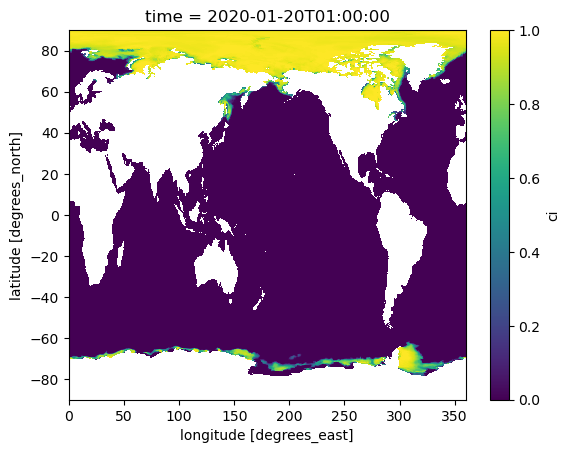

In [41]:
reader.regrid(dd.ci.isel(time=1)).plot()

In [43]:
reader.fldmean(dd.ci.isel(time=1)).values

array(0.0413731)

### FDB buffering

In case you wish not to change your script to accomodate for an iterator, it is possible (paying the proce of increased disk access) to buffer the result into a temporary directory. The user needs to specify the location of a directory in which such temporary directories will be created. Please keep in mind that these are huge datasets, so this operation may require time and disk space. The directories are temporary directories which should be erased automatically if the process is closed regularly. This is not always the case working in a notebook, so please do some houskeeping yourself.

In [10]:
from aqua import Reader, catalogue
reader = Reader(model="IFS", exp="fdb-tco399", source="fdb-long", aggregation="D", regrid="r025", buffer="/scratch/jost/aqua/buffer", loglevel="INFO")
data = reader.retrieve(startdate='20200201', enddate='20200229', var='ci')

2023-08-22 16:34:44 :: Reader :: INFO     -> Retrieving variables: ['ci']
2023-08-22 16:34:44 :: Reader :: INFO     -> Buffering iterator to: /scratch/jost/aqua/buffer/tmp0vsco_xi
2023-08-22 16:35:02 :: Reader :: INFO     -> Data model: ../../config/data_models/ifs2cds.json


The result is now a regular dask (lazy) xarray.Dataset

In [11]:
data

<xarray.Dataset>
Dimensions:     (ncells: 654400, cell_corners: 4, time: 696)
Coordinates:
    lon         (ncells) float64 dask.array<chunksize=(654400,), meta=np.ndarray>
    lat         (ncells) float64 dask.array<chunksize=(654400,), meta=np.ndarray>
    lon_bounds  (ncells, cell_corners) float64 dask.array<chunksize=(654400, 4), meta=np.ndarray>
    lat_bounds  (ncells, cell_corners) float64 dask.array<chunksize=(654400, 4), meta=np.ndarray>
  * time        (time) datetime64[ns] 2020-02-01 ... 2020-02-29T23:00:00
Dimensions without coordinates: ncells, cell_corners
Data variables:
    ci          (time, ncells) float64 dask.array<chunksize=(24, 654400), meta=np.ndarray>
Attributes:
    history:  2023-08-22 16:35:02 retrieved by AQUA retriever;\n2023-08-22 16...

### Access to new IFS-NEMO control and historical runs on LUMI

The new source have now been added to the catalogue and it is possible to read these data directly from the FDB through the reader

In [11]:
from aqua import Reader
reader = Reader(model='IFS', exp='fdb-control-1950', source='monthly-1deg-3d')
data = reader.retrieve(var="t")
next(data)


2023-08-26 21:03:51 :: Reader :: WARNING  -> No variables in the fixes for source monthly-1deg-3d
2023-08-26 21:03:51 :: Reader :: WARNING  -> Returning the original variable


<xarray.Dataset>
Dimensions:  (lon: 360, lat: 181, time: 1, plev: 19)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 90.0 89.0 88.0 87.0 86.0 ... -87.0 -88.0 -89.0 -90.0
  * time     (time) datetime64[ns] 1950-02-01
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
Data variables:
    t        (time, plev, lat, lon) float64 246.8 246.8 246.8 ... 288.6 288.6
Attributes:
    history:  2023-08-26 21:04:03 dataset retrieved by GSV interface;\n2023-0...

2023-08-26 21:26:16 :: Reader :: WARNING  -> No variables in the fixes for source hourly-native
2023-08-26 21:26:16 :: Reader :: WARNING  -> Returning the original variable


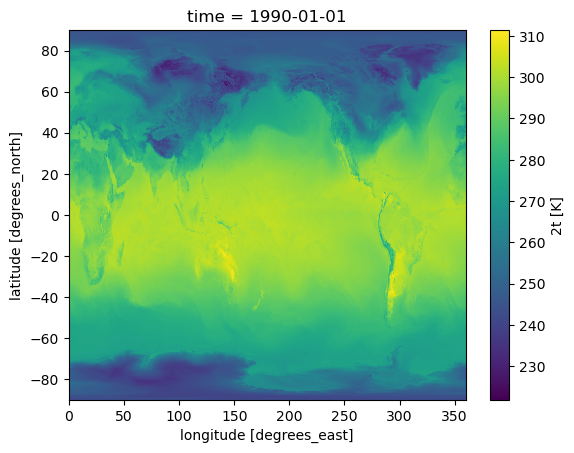

In [15]:
from aqua import Reader
reader = Reader(model='IFS', exp='fdb-historical-1990', source='hourly-native', aggregation="D", regrid="r025")
data = reader.retrieve(var="2t")
dd = next(data)
reader.regrid(dd)["2t"].isel(time=0).plot()